In [2]:
# step 1 : Import the libraries
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# step 2 : Load the dataset
df = pd.read_csv(r'C:\Users\Family\DS_PRACTICE\EDA\data\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# step 3 : statistical analysis
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

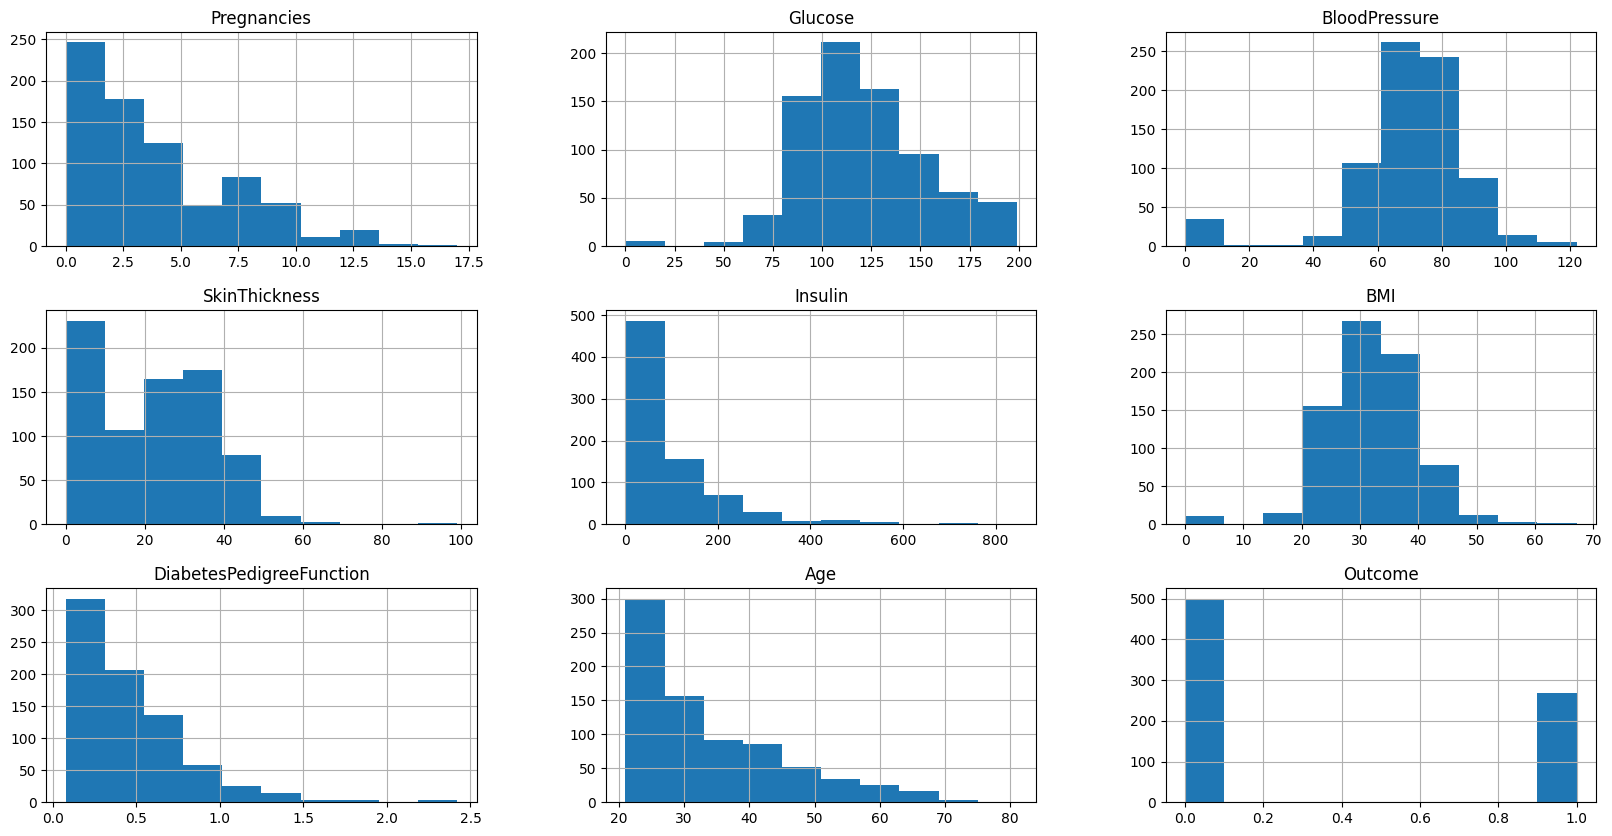

In [10]:
# step 4 : visualize data for insights
df.hist( figsize=(20,10))

In [11]:
# check the columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

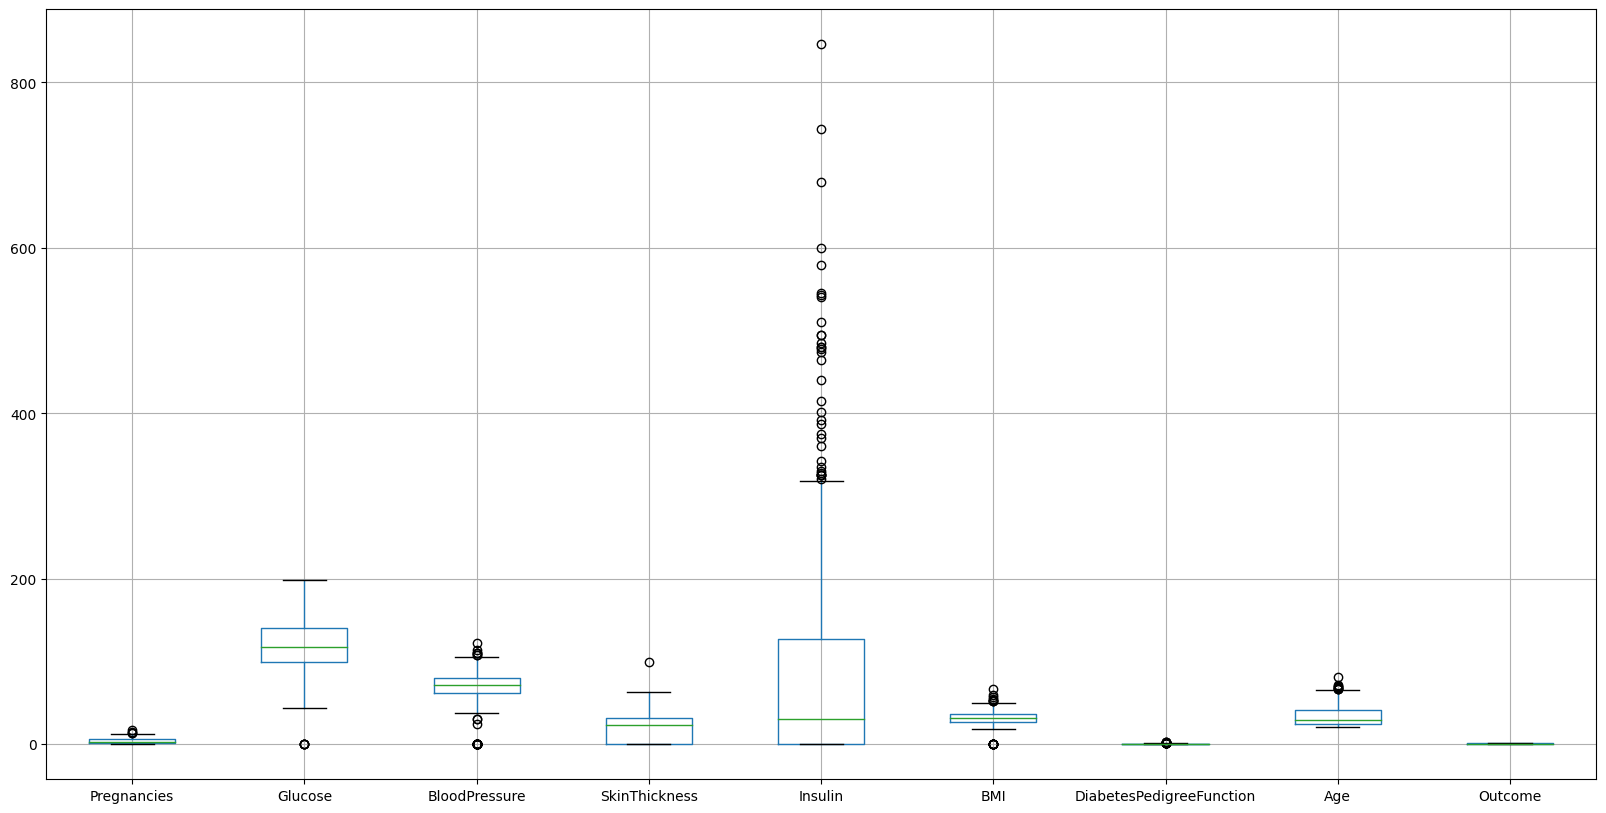

In [14]:
# step 4 : check the outliers
df.boxplot(figsize=(20,10))

In [17]:
# method to remove outliers
def remove_outliers(df, column, multiplier=1.5):
    q1, q3 = np.percentile(df[column], [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (multiplier*iqr)
    upper_bound = q3 + (multiplier*iqr)
    clean_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    outliers = df[(df[column] < lower_bound) & (df[column] > upper_bound)]
    precent_outliers = (len(outliers)/len(df))*100
    print(precent_outliers)

    return outliers

columns=[col for col in df.columns if col!='BloodPressure']
multipliers = {'BloodPressure': 0.75}

clean_data = df.copy()
for col in columns:
    multiplier = multipliers.get(col, 1.5)
    clean_data = remove_outliers(clean_data, col, multiplier)

<Axes: >

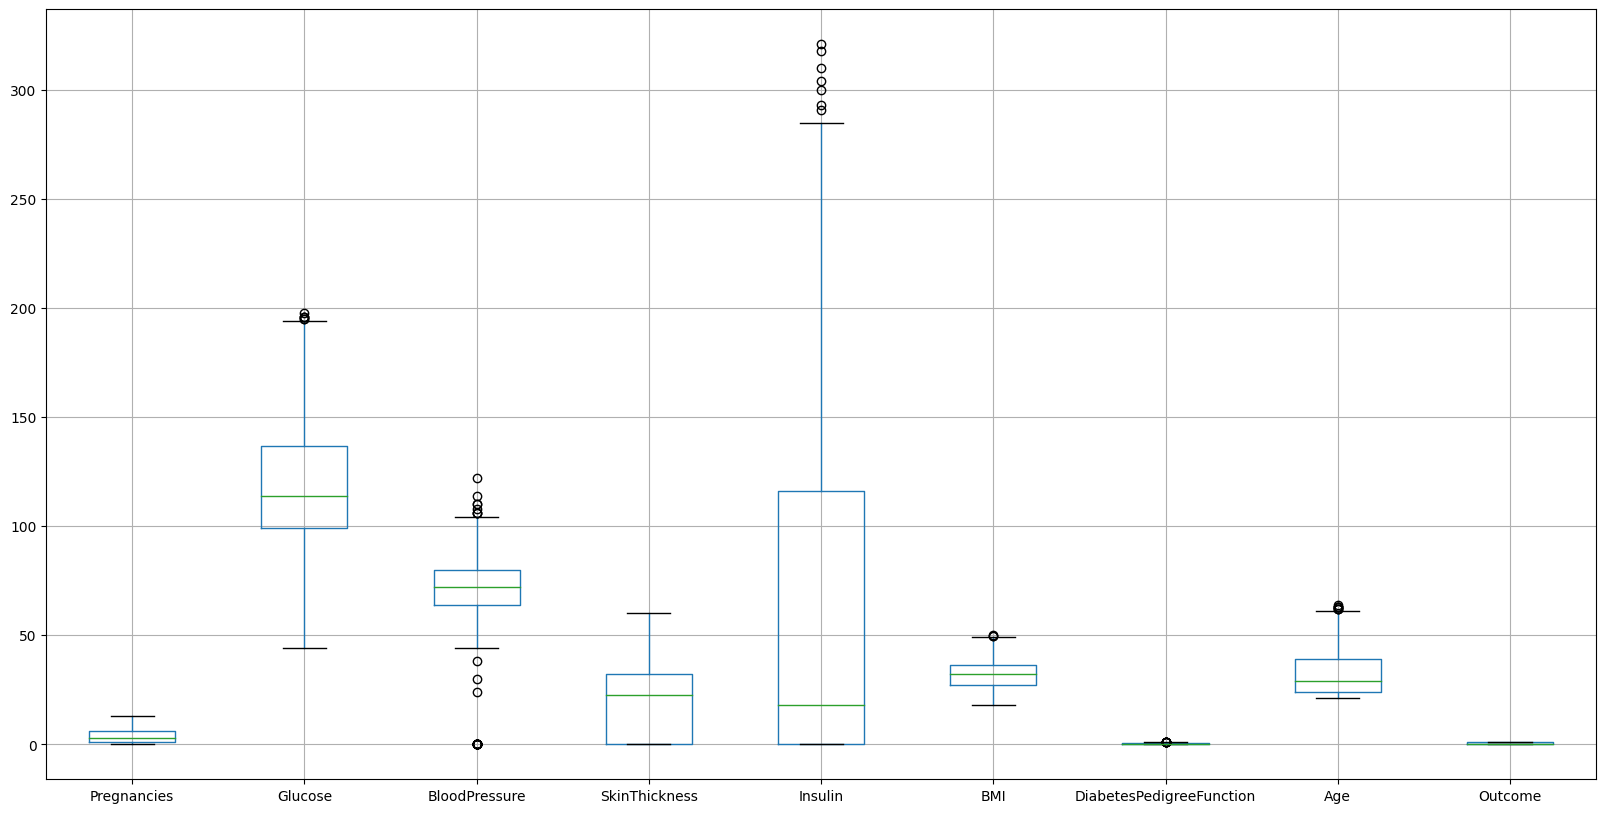

In [19]:
clean_data.boxplot(figsize=(20,10))

In [21]:
import numpy as np

def calculate_outlier_percentage(df, column, multiplier=1.5):
    # Calculate quartiles and IQR
    q1, q3 = np.percentile(df[column].dropna(), [25, 75])
    iqr = q3 - q1
    
    # Calculate bounds
    lower_bound = q1 - (multiplier * iqr)
    upper_bound = q3 + (multiplier * iqr)
    
    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    
    return outlier_percentage

# Define columns and multipliers
columns = [col for col in df.columns if col != 'BloodPressure']
multipliers = {'BloodPressure': 0.75}

# Calculate outlier percentages
outlier_percentages = {}
for col in columns:
    multiplier = multipliers.get(col, 1.5)
    outlier_percentages[col] = calculate_outlier_percentage(df, col, multiplier)

# Display the results
for col, percentage in outlier_percentages.items():
    print(f"Column {col} has {percentage:.2f}% outliers.")


Column Pregnancies has 0.52% outliers.
Column Glucose has 0.65% outliers.
Column SkinThickness has 0.13% outliers.
Column Insulin has 4.43% outliers.
Column BMI has 2.47% outliers.
Column DiabetesPedigreeFunction has 3.78% outliers.
Column Age has 1.17% outliers.
Column Outcome has 0.00% outliers.
